<a href="https://colab.research.google.com/github/srinikha193/Segmentation_Clustering_Exercise/blob/main/MultiDimensionalScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptual Mapping

### Step1: Load packages

In [ ]:
 !pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 593.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 35.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=f7cca855a3ba3a3f5634a287c24b1d23ce63f03aaa0d8c4aa0e759c21677bbdb
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
import os
import pandas as pd # version 1.4.3
import numpy as np # version 1.23.2
from sklearn.preprocessing import StandardScaler # version 1.0.2
from factor_analyzer import FactorAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

### Step2: Read in Perception Data

In [ ]:
per = pd.read_csv("/content/sample_data/perceptions (1).csv")
per.head()

,Brand,Price,Convenience,Customer Service,In-Store Experience,Product Variety,Product Quality,Location
0,Chestnut Ridge,5.0,6.9,4.2,3.9,5.1,3.1,2.6
1,Retailer A,6.0,3.8,4.9,3.7,3.8,3.8,5.5
2,Retailer B,5.9,4.4,6.2,3.6,1.1,6.8,6.1
3,Retailer C,6.6,3.7,6.5,3.6,3.6,6.7,4.4
4,Retailer D,3.6,0.9,4.1,4.9,4.1,4.9,1.1


### Step3: Run Principal Components Analysis(PCA) on Perceptions

##### Step3-1: Scale the Data Set

In [ ]:
scale = StandardScaler()
per_scaled = scale.fit_transform(per.iloc[:,1:]) # Exclude the first variable "Brand" (Not a number)

##### Step3-2: Run Factor Analysis with Scaled Data Set

In [ ]:
fa = FactorAnalyzer(rotation="varimax", n_factors=2, method='principal')
fa.fit(per_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

### Step4: Perceptual Map Data -- Atribute Factors and CSV File

##### Calculate Factor Loading

In [ ]:
loadings2 = pd.DataFrame(fa.loadings_, index=per.columns[1:], columns=[f"Factor{i+1}" for i in range(2)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')
# display the results
rotated_factor_pattern

,Factor1,Factor2
Price,0.755100,NaN
Convenience,-0.581905,0.752318
Customer Service,0.919399,NaN
In-Store Experience,NaN,-0.934160
Product Variety,-0.741922,NaN
Product Quality,0.882490,NaN
Location,NaN,0.831866


### Step 5: Perceptual Mapping

##### Check Factor Score

In [ ]:
factors = fa.transform(per_scaled)
pca_scores = pd.DataFrame(factors, columns=["Factor1", "Factor2"], index=per.Brand)
# Normalize the score by divideing each Score column with its maximum value
pca_scores_norm = pca_scores.apply(lambda x: x/max(abs(x)), axis=0)
pca_scores_norm

,Factor1,Factor2
Brand,,
Chestnut Ridge,-0.719425,0.245832
Retailer A,-0.009793,0.331669
Retailer B,0.803161,0.412439
Retailer C,0.636001,0.206760
Retailer D,-0.091191,-1.000000
Retailer E,-1.000000,0.216362
Retailer F,0.381247,-0.413062


##### Create a Perceptual Map

Text(0.5, 1.0, 'Perceptual Map')

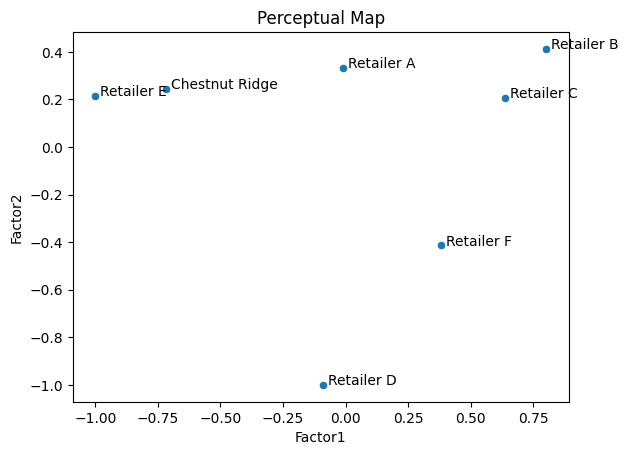

In [ ]:
def label_point(x, y, ax):
    a = pd.concat([x, y], axis=1).reset_index()
    for i, point in a.iterrows():
        ax.text(point['Factor1']+.02, point['Factor2'], str(point['Brand']))

ax = sns.scatterplot(data=pca_scores_norm, x="Factor1", y="Factor2")
label_point(pca_scores_norm.Factor1, pca_scores_norm.Factor2, plt.gca())
plt.title('Perceptual Map')